**<h2> DATA MANIPULATION & NAIVE BAYES CLASSIFIER WITH FLIGHTS DATESET <h2>**

<h3>

By [*Chris Le*](https://www.linkedin.com/in/hdang-le3107/)

<h3>

The aviation industry is dynamic with various variables impacting flight operations. A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport):

This project seeks to analyze the `flights2022.csv` dataset containing *111,006* flight records and *29* fields.

The project consists of two parts:


<h3>
I. Data Manipulation, EDA and Visualizations <br>

II. Naive Bayes Classifier to Predict Flight Cancellations
<h3>

##### `flights2022.csv`

Contains information about each flight, including:


| **Column**           | **Data Type** | **Description**                                                                                                 | **Example Values**                 |
|----------------------|---------------|-----------------------------------------------------------------------------------------------------------------|------------------------------------|
| **year**             | int64         | Calendar year of the flight.                                                                                    | 2022                               |
| **month**            | int64         | Month of the flight (1–12).                                                                                     | 1, 2, ..., 12                      |
| **day**              | int64         | Day of the month (1–31).                                                                                        | 1, 2, 3, ...                       |
| **dep_time**         | float64       | Actual departure time in “HHMM” format (no colon). NA = cancelled flight. For example, 1.0 means 00:01, 2359 means 23:59.              | 1.0, 10.0, 25.0, 1305.0            |
| **sched_dep_time**   | int64         | Scheduled departure time in “HHMM” format.                                                                      | 2359, 2250, 2355                   |
| **dep_delay**        | float64       | Departure delay in minutes. Positive values = minutes late, negative = minutes early, zero = on time.           | 2.0, 71.0, 15.0                    |
| **arr_time**         | float64       | Actual arrival time in “HHMM” format (float).                                                                   | 604.0, 242.0, 759.0                |
| **sched_arr_time**   | int64         | Scheduled arrival time in “HHMM” format.                                                                        | 618, 142, 730                      |
| **arr_delay**        | float64       | Arrival delay in minutes. Positive = late arrival, negative = early arrival.                                    | -14.0, 60.0, 29.0                  |
| **carrier**          | object        | Two-letter airline carrier code.                                                                                | "UA", "AS", "AA"                   |
| **flight**           | int64         | Flight number assigned by the carrier.                                                                          | 1545, 15, 43                       |
| **tailnum**          | object        | Aircraft tail number (unique plane identifier).                                                                 | "N738MA", "N419AS"                 |
| **origin**           | object        | Origin airport where flight starts (IATA code).                                                                  | "JFK", "LGA", "EWR"                |
| **dest**             | object        | Destination airport where flight lands (IATA code).                                                                                      | "SEA", "SFO", "ORD"                |
| **air_time**         | float64       | Flight time in the air (minutes).                                                                               | 300.0, 200.0, etc.                 |
| **distance**         | int64         | Distance between airports (miles).                                                                              | 250, 800, 2475                     |
| **hour**             | int64         | Extracted hour portion of scheduled departure time (0–23).                                                      | 23, 22, etc.                       |
| **minute**           | int64         | Extracted minute portion of scheduled departure time (0–59).                                                    | 59, 50, etc.                       |
| **time_hour**        | object        | Date/Time Recorded.                              | "2022-01-01 23:00:00"              |
| **airline**          | object        | Carrier/airline name.                                                                                              | "United Air Lines Inc.", "Alaska Airlines Inc." |
| **temp**             | float64       | Recorded temperature (in Fahrenheit) at the origin airport (from weather data).                                 | 33.0, 32.0, etc.                   |
| **dewp**             | float64       | Dew Point Temperature (in degrees Fahrenheit).                                                                             | 23.0, 19.0, etc.                   |
| **humid**            | float64       | Relative humidity percentage.                                                                                 | 66.06, 69.04, etc.                 |
| **wind_dir**         | float64       | Wind direction (in degrees, 0–360).                                                                             | 160.0, 170.0, etc.                 |
| **wind_speed**       | float64       | Wind speed (in mph).                                                                                            | 8.05546, 9.20624, etc.             |
| **wind_gust**        | float64       | Wind gust speed (in mph).                                                                                       | 9.270062, 10.594357, etc.          |
| **precip**           | float64       | Precipitation (in inches) recorded at departure airport.                                                        | 0.0, 0.5, etc.                     |
| **pressure**         | float64       | Atmospheric Pressure (in hPa).                                                                      | 1022.9, 1023.4, etc.               |
| **visib**            | float64       | Visibility (in miles).                                                                                          | 10.0, 4.0, etc.                    |




**<h3> `I. Handling NAs` <h3>**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv("flights2022.csv")
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022,1,1,51.0,2352,59.0,840.0,758,42.0,B6,366,N625JB,PDX,JFK,269.0,2454,23,52,2022-01-01T23:00:00Z,JetBlue Airways,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022,1,1,104.0,43,21.0,936.0,930,6.0,AA,501,N413AN,SEA,MIA,312.0,2724,0,43,2022-01-01T00:00:00Z,American Airlines Inc.,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022,1,1,131.0,2251,160.0,216.0,2347,149.0,QX,607,N444QX,SEA,PSC,32.0,172,22,51,2022-01-01T22:00:00Z,Horizon Air,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022,1,1,142.0,2305,157.0,900.0,657,123.0,UA,780,N37419,SEA,IAD,240.0,2306,23,5,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022,1,1,255.0,2355,180.0,831.0,549,162.0,UA,784,N429UA,SEA,ORD,189.0,1721,23,55,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


In [12]:
num_rows = len(df)
print(f"Number of rows: {num_rows}")

Number of rows: 111006


In [13]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          2440
sched_dep_time       0
dep_delay         2440
arr_time          2537
sched_arr_time       0
arr_delay         2674
carrier              0
flight               0
tailnum            128
origin               0
dest                 0
air_time          2674
distance             0
hour                 0
minute               0
time_hour            0
airline              0
temp                 0
dewp                 0
humid                0
wind_dir          3163
wind_speed         279
wind_gust          279
precip               0
pressure             0
visib                0
dtype: int64

In [14]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# Sort values in descending order and format to 2 decimal places
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage_formatted = missing_percentage_sorted.apply(lambda x: f"{x:.2f}%")

print("Percentage of missing values per column:")
print(missing_percentage_formatted)

Percentage of missing values per column:
wind_dir      2.85%
arr_delay     2.41%
air_time      2.41%
arr_time      2.29%
dep_time      2.20%
dep_delay     2.20%
wind_speed    0.25%
wind_gust     0.25%
tailnum       0.12%
dtype: object


+ For dep_time, NAs represent "cancelled" flights so we don't have to worry about them 
+ dep_time is associated with dep_delay so the matching NAs makes sense
+ Since only relatively small amount of "tailnum" is missing, removing them is acceptable


In [15]:
# Remove records with blank (NA) in 'tailnum'
df = df[df['tailnum'].notna()]

In [16]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          2312
sched_dep_time       0
dep_delay         2312
arr_time          2409
sched_arr_time       0
arr_delay         2546
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          2546
distance             0
hour                 0
minute               0
time_hour            0
airline              0
temp                 0
dewp                 0
humid                0
wind_dir          3161
wind_speed         279
wind_gust          279
precip               0
pressure             0
visib                0
dtype: int64

In [17]:
# Find rows where dep_time is not NA but arr_time is NA
missing_arrivals = df[df['dep_time'].notna() & df['arr_time'].isna()]

# Display the count and the relevant columns
print(f"Number of flights with missing arrival times: {len(missing_arrivals)}")
print("\nSample of these flights:")
missing_arrivals.head(5)

Number of flights with missing arrival times: 97

Sample of these flights:


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
466,2022,1,1,2255.0,2125,90.0,NaN,2335,NaN,AS,456,N291BT,SEA,SFO,NaN,679,21,25,2022-01-01T21:00:00Z,Alaska Airlines Inc.,32.0,21.9,65.92,160.0,9.20624,10.594357,0.00,1023.7,10.0
1076,2022,1,2,2341.0,2253,48.0,NaN,2354,NaN,QX,603,N452QX,SEA,ALW,NaN,213,22,53,2022-01-02T22:00:00Z,Horizon Air,41.0,33.0,73.25,140.0,9.20624,10.594357,0.00,1006.1,7.0
1183,2022,1,3,658.0,700,-2.0,NaN,1301,NaN,UA,541,N75432,SEA,ORD,NaN,1721,7,0,2022-01-03T07:00:00Z,United Air Lines Inc.,36.0,34.0,92.35,110.0,12.65858,14.567241,0.07,998.3,7.0
1215,2022,1,3,758.0,755,3.0,NaN,936,NaN,AS,33,N644AS,SEA,JNU,NaN,909,7,55,2022-01-03T07:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,110.0,12.65858,14.567241,0.07,998.3,7.0
1297,2022,1,3,1030.0,900,90.0,NaN,1005,NaN,QX,723,N450QX,SEA,GEG,NaN,224,9,0,2022-01-03T09:00:00Z,Horizon Air,36.0,34.0,92.35,170.0,5.75390,6.621473,0.02,997.9,7.0


air_time, arr_time and arr_delay missing seems to have no pattern. Since only a small fraction is missing, it's reasonable to assume that there is a lag and the data wasn't updated timely. They wouldn't be used for modelling so it's fine to keep them as they are

In [18]:
# Display count of missing wind_dir_time and investigate those records
missing_windir_time = df[df['wind_dir'].isna()]
print(f"Number of flights with missing wind direction: {len(missing_windir_time)}")
print("\nSample of flights with missing wind direction:")
missing_windir_time.head(5)

Number of flights with missing wind direction: 3161

Sample of flights with missing wind direction:


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1135,2022,1,3,56.0,2300,116.0,846.0,703,103.0,UA,743,N27421,PDX,EWR,260.0,2434,23,0,2022-01-03T23:00:00Z,United Air Lines Inc.,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1140,2022,1,3,128.0,2359,89.0,651.0,605,46.0,UA,849,N38459,PDX,IAH,187.0,1825,23,59,2022-01-03T23:00:00Z,United Air Lines Inc.,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1141,2022,1,3,133.0,2352,101.0,913.0,758,75.0,B6,366,N569JB,PDX,JFK,263.0,2454,23,52,2022-01-03T23:00:00Z,JetBlue Airways,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1277,2022,1,3,956.0,1000,-4.0,1224.0,1232,-8.0,AS,427,N291BT,SEA,LAS,115.0,867,10,0,2022-01-03T10:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,NaN,3.45234,3.972884,0.12,997.8,6.0
1283,2022,1,3,1015.0,1014,1.0,1353.0,1354,-1.0,AS,230,N248AK,SEA,DEN,124.0,1024,10,14,2022-01-03T10:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,NaN,3.45234,3.972884,0.12,997.8,6.0


In [19]:
from sklearn.impute import KNNImputer
import numpy as np

# Select columns needed for imputation
weather_cols = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']
weather_data = df[weather_cols].copy()

# Create KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')

# Fit and transform the data
weather_imputed = imputer.fit_transform(weather_data)

# Create a DataFrame with imputed values
weather_imputed_df = pd.DataFrame(weather_imputed, columns=weather_cols, index=df.index)

# Update the original dataframe with imputed values
df['wind_dir'] = weather_imputed_df['wind_dir']
df['wind_speed'] = weather_imputed_df['wind_speed']
df['wind_gust'] = weather_imputed_df['wind_gust']

# Verify imputation
print("Missing values after KNN imputation:")
print(df[weather_cols].isna().sum())

Missing values after KNN imputation:
temp          0
dewp          0
humid         0
wind_dir      0
wind_speed    0
wind_gust     0
precip        0
pressure      0
visib         0
dtype: int64


In [20]:
# Check for the number of rows after imputation, should be 111,006 - 128 = 110,878
len(df)

110878

**<h3> `II. Fixing Time Format` <h3>**

Exploring the data, we see that dep_time, sched_dep_time, arr_time, sched_dep_time need to be transformed for furthur analysis

#TODO:
+ transform float -> HHMM format -> datetype
+ date inconsistency between dep_time and sched_dep_time for values near day transitions
+ date inconsistency between arr_time and sched_arr_time for values near day transitions

Reason: only one set of (year, month, day) in the data, while dep_datetime and arr_datetime can be on two different dates, similarly for sched_dep_datetime and sched_arr_datetime 
+ -> to deal with this, we assume the set of date belongs to sched_dep. Using sched_dep as the base, we transform the rest as needed based on air_time, dep_delay, arr_delay


In [21]:
df[['dep_time', 'sched_dep_time', 'dep_delay', 'year', 'month', 'day']].head(5)

,dep_time,sched_dep_time,dep_delay,year,month,day
0,1.0,2359,2.0,2022,1,1
1,1.0,2250,71.0,2022,1,1
2,10.0,2355,15.0,2022,1,1
3,25.0,2350,35.0,2022,1,1
4,35.0,2349,46.0,2022,1,1


Looking at the portion above, for the first record, we can see the dep_time and sched_dep_time don't make sense as they shouldn't occur on the same date. The dep_delay is 2 minutes, and the flight's scheduled departure is recorded to be 23:59 Jan 1, meaning the dep_time should actually 1 day after, 00:01 Jan 2 2022

In [22]:
df[df['dep_time'] >= 2400][['dep_time', 'sched_dep_time', 'dep_delay','year', 'month', 'day']].head(5)

,dep_time,sched_dep_time,dep_delay,year,month,day
1086,2400.0,2246,74.0,2022,1,2
3354,2400.0,2253,67.0,2022,1,6
4553,2400.0,2150,130.0,2022,1,8
25932,2400.0,2359,1.0,2022,2,15
27087,2400.0,2359,1.0,2022,2,17


Additionally, these records above also need transformations, as dep_time of 24:00 should be written as 00:00 the day after. This problem seems to only occur when dep_time lands exactly when day changes

First, let's reformat the int date columns into datetime and handle the 2400 by increasing 1 day

In [23]:
# Create base datetime column from year, month, day
df['date'] = pd.to_datetime(
    df[['year', 'month', 'day']]
    .join(pd.Series(1, index=df.index, name='hour'))
)

# Function to convert HHMM to datetime
def hhmm_to_datetime(row, time_col):
    if pd.isna(row[time_col]):
        return pd.NaT

    # Convert HHMM to hours and minutes
    time_str = str(int(float(row[time_col]))).zfill(4)
    hours = int(time_str[:2])
    minutes = int(time_str[2:])

    # Get the base date from the row
    date = pd.to_datetime(row['date'])

    # Handle 24:00 times
    if hours >= 24:
        hours -= 24
        date += pd.Timedelta(days=1)

    # Create datetime using the adjusted date
    return date.replace(hour=hours, minute=minutes)

# Create datetime columns for time fields
time_columns = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']
for col in time_columns:
    df[f'{col}_datetime'] = df.apply(lambda row: hhmm_to_datetime(row, col), axis=1)

print("Sample of new time-based columns:")
display(
    df[
        [
            'air_time',
            'dep_time_datetime',
            'sched_dep_time_datetime',
            'arr_time_datetime',
            'sched_arr_time_datetime',
            'arr_delay',
            'dep_delay',
            'year',
            'month',
            'day',
            'dep_time',
            'sched_dep_time',
            'arr_time',
            'sched_arr_time',
        ]
    ].head(10)
)

Sample of new time-based columns:


,air_time,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime,arr_delay,dep_delay,year,month,day,dep_time,sched_dep_time,arr_time,sched_arr_time
0,221.0,2022-01-01 00:01:00,2022-01-01 23:59:00,2022-01-01 06:04:00,2022-01-01 06:18:00,-14.0,2.0,2022,1,1,1.0,2359,604.0,618
1,193.0,2022-01-01 00:01:00,2022-01-01 22:50:00,2022-01-01 02:42:00,2022-01-01 01:42:00,60.0,71.0,2022,1,1,1.0,2250,242.0,142
2,261.0,2022-01-01 00:10:00,2022-01-01 23:55:00,2022-01-01 07:59:00,2022-01-01 07:30:00,29.0,15.0,2022,1,1,10.0,2355,759.0,730
3,193.0,2022-01-01 00:25:00,2022-01-01 23:50:00,2022-01-01 06:06:00,2022-01-01 05:50:00,16.0,35.0,2022,1,1,25.0,2350,606.0,550
4,196.0,2022-01-01 00:35:00,2022-01-01 23:49:00,2022-01-01 06:16:00,2022-01-01 05:45:00,31.0,46.0,2022,1,1,35.0,2349,616.0,545
5,269.0,2022-01-01 00:51:00,2022-01-01 23:52:00,2022-01-01 08:40:00,2022-01-01 07:58:00,42.0,59.0,2022,1,1,51.0,2352,840.0,758
6,312.0,2022-01-01 01:04:00,2022-01-01 00:43:00,2022-01-01 09:36:00,2022-01-01 09:30:00,6.0,21.0,2022,1,1,104.0,43,936.0,930
7,32.0,2022-01-01 01:31:00,2022-01-01 22:51:00,2022-01-01 02:16:00,2022-01-01 23:47:00,149.0,160.0,2022,1,1,131.0,2251,216.0,2347
8,240.0,2022-01-01 01:42:00,2022-01-01 23:05:00,2022-01-01 09:00:00,2022-01-01 06:57:00,123.0,157.0,2022,1,1,142.0,2305,900.0,657
9,189.0,2022-01-01 02:55:00,2022-01-01 23:55:00,2022-01-01 08:31:00,2022-01-01 05:49:00,162.0,180.0,2022,1,1,255.0,2355,831.0,549


To address the day transition issue, we need to come up logic that covers all cases
+ Find out when dep_time is 1 day after sched_dep_time
+ Find out when arr_time is 1 day after sched_dep_time
+ Find out when shced_arr_time is 1 day after sched_dep_time

To do this, we use 
+ dep_delay to refer to dep_time from sched_dep_time as base (1 cond)
+ arr_delay and air_time to refer to arr_time from sched_arr_time as base (2 conds)
+ air_time to refer to sched_arr_time from sched_dep_time as base (1 cond)

E.g:
+ Convert actual datetime into minutes, for example, 2022-01-01 00:01:00 = 60 (minutes)
+ Compare datetime to delay
+ If actual datetime < delay, e.g 01:00:00 but delay 62 min, increase actual datetime by 1 (the day after)


In [24]:
# Adjust departure time 
# Extract hours and minutes from dep datetime and convert to total minutes

mask1 = df['dep_delay'] > df['dep_time_datetime'].dt.hour * 60 + df['dep_time_datetime'].dt.minute
df.loc[mask1, 'dep_time_datetime'] = df.loc[mask1, 'dep_time_datetime'] + pd.Timedelta(days=1)

# Adjust arrival time
# Extract hours and minutes from arr datetime and convert to total minutes

mask2 = (df['arr_delay'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute) | (df['air_time'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute) | (df['arr_time_datetime'] < df['dep_time_datetime'])
df.loc[mask2, 'arr_time_datetime'] = df.loc[mask2, 'arr_time_datetime'] + pd.Timedelta(days=1)

# # Adjust scheduled arrival time
# # Extract hours and minutes from sched arr datetime and convert to total minutes

mask3 = (df['air_time'] > df['sched_arr_time_datetime'].dt.hour * 60 + df['sched_arr_time_datetime'].dt.minute) | (df['sched_arr_time_datetime'] < df['sched_dep_time_datetime'])
df.loc[mask3, 'sched_arr_time_datetime'] = df.loc[mask3, 'sched_arr_time_datetime'] + pd.Timedelta(days=1)

# # Adjust arrival time
# Extract hours and minutes from sched arr datetime and convert to total minutes

# mask4 = df['air_time'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute
# df.loc[mask4, 'arr_time_datetime'] = df.loc[mask4, 'arr_time_datetime'] + pd.Timedelta(days=1)


Departure Time Transformation

In [25]:
df[df['dep_delay'] > df['dep_time_datetime'].dt.hour * 60 + df['dep_time_datetime'].dt.minute][['dep_time_datetime', 'sched_dep_time_datetime', 'dep_delay', 'date', 'year', 'month', 'day']]

,dep_time_datetime,sched_dep_time_datetime,dep_delay,date,year,month,day
0,2022-01-02 00:01:00,2022-01-01 23:59:00,2.0,2022-01-01 01:00:00,2022,1,1
1,2022-01-02 00:01:00,2022-01-01 22:50:00,71.0,2022-01-01 01:00:00,2022,1,1
2,2022-01-02 00:10:00,2022-01-01 23:55:00,15.0,2022-01-01 01:00:00,2022,1,1
3,2022-01-02 00:25:00,2022-01-01 23:50:00,35.0,2022-01-01 01:00:00,2022,1,1
4,2022-01-02 00:35:00,2022-01-01 23:49:00,46.0,2022-01-01 01:00:00,2022,1,1
...,...,...,...,...,...,...,...
110366,2022-06-30 14:18:00,2022-06-29 22:15:00,963.0,2022-06-29 01:00:00,2022,6,29
110660,2022-07-01 00:01:00,2022-06-30 21:35:00,146.0,2022-06-30 01:00:00,2022,6,30
110661,2022-07-01 00:01:00,2022-06-30 23:32:00,29.0,2022-06-30 01:00:00,2022,6,30
110664,2022-07-01 00:17:00,2022-06-30 23:59:00,18.0,2022-06-30 01:00:00,2022,6,30


Arrival Time Transformation

In [26]:
df[(df['arr_delay'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute) | (df['air_time'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute) | (df['arr_time_datetime'] < df['dep_time_datetime'])][['arr_time_datetime', 'sched_arr_time_datetime', 'arr_delay', 'dep_time_datetime', 'sched_dep_time_datetime', 'dep_delay', 'air_time','date', 'year', 'month', 'day']]

,arr_time_datetime,sched_arr_time_datetime,arr_delay,dep_time_datetime,sched_dep_time_datetime,dep_delay,air_time,date,year,month,day
1,2022-01-02 02:42:00,2022-01-02 01:42:00,60.0,2022-01-02 00:01:00,2022-01-01 22:50:00,71.0,193.0,2022-01-01 01:00:00,2022,1,1
7,2022-01-02 02:16:00,2022-01-01 23:47:00,149.0,2022-01-02 01:31:00,2022-01-01 22:51:00,160.0,32.0,2022-01-01 01:00:00,2022,1,1
112,2022-01-02 14:30:00,2022-01-01 20:16:00,1094.0,2022-01-02 08:55:00,2022-01-01 14:21:00,1114.0,188.0,2022-01-01 01:00:00,2022,1,1
306,2022-01-02 00:52:00,2022-01-01 23:59:00,53.0,2022-01-01 15:47:00,2022-01-01 15:35:00,12.0,314.0,2022-01-01 01:00:00,2022,1,1
332,2022-01-02 00:16:00,2022-01-01 23:58:00,18.0,2022-01-01 16:24:00,2022-01-01 16:15:00,9.0,271.0,2022-01-01 01:00:00,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
110642,2022-06-30 00:17:00,2022-06-30 00:18:00,-1.0,2022-06-29 23:26:00,2022-06-29 23:30:00,-4.0,25.0,2022-06-29 01:00:00,2022,6,29
110643,2022-06-30 01:51:00,2022-06-30 02:02:00,-11.0,2022-06-29 23:30:00,2022-06-29 23:30:00,0.0,182.0,2022-06-29 01:00:00,2022,6,29
110645,2022-06-30 01:38:00,2022-06-30 00:15:00,83.0,2022-06-29 23:40:00,2022-06-29 22:10:00,90.0,100.0,2022-06-29 01:00:00,2022,6,29
110660,2022-07-01 01:42:00,2022-06-30 23:20:00,142.0,2022-07-01 00:01:00,2022-06-30 21:35:00,146.0,83.0,2022-06-30 01:00:00,2022,6,30


Scheduled Arrival Time Transformation

In [27]:
df[df['air_time'] > df['sched_arr_time_datetime'].dt.hour * 60 + df['sched_arr_time_datetime'].dt.minute][['dep_time_datetime', 'sched_dep_time_datetime','arr_time_datetime', 'sched_arr_time_datetime', 'air_time','arr_delay', 'dep_delay', 'date', 'year', 'month', 'day']]

,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime,air_time,arr_delay,dep_delay,date,year,month,day
1,2022-01-02 00:01:00,2022-01-01 22:50:00,2022-01-02 02:42:00,2022-01-02 01:42:00,193.0,60.0,71.0,2022-01-01 01:00:00,2022,1,1
434,2022-01-01 21:21:00,2022-01-01 21:18:00,2022-01-02 00:03:00,2022-01-02 00:08:00,199.0,-5.0,3.0,2022-01-01 01:00:00,2022,1,1
440,2022-01-01 21:34:00,2022-01-01 20:30:00,2022-01-02 01:09:00,2022-01-02 00:15:00,136.0,54.0,64.0,2022-01-01 01:00:00,2022,1,1
452,2022-01-01 22:22:00,2022-01-01 21:30:00,2022-01-02 01:07:00,2022-01-02 00:15:00,190.0,52.0,52.0,2022-01-01 01:00:00,2022,1,1
455,2022-01-01 22:37:00,2022-01-01 21:25:00,2022-01-02 01:35:00,2022-01-02 00:17:00,198.0,78.0,72.0,2022-01-01 01:00:00,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
110636,2022-06-29 23:08:00,2022-06-29 22:55:00,2022-06-30 01:25:00,2022-06-30 01:25:00,117.0,0.0,13.0,2022-06-29 01:00:00,2022,6,29
110642,2022-06-29 23:26:00,2022-06-29 23:30:00,2022-06-30 00:17:00,2022-06-30 00:18:00,25.0,-1.0,-4.0,2022-06-29 01:00:00,2022,6,29
110643,2022-06-29 23:30:00,2022-06-29 23:30:00,2022-06-30 01:51:00,2022-06-30 02:02:00,182.0,-11.0,0.0,2022-06-29 01:00:00,2022,6,29
110645,2022-06-29 23:40:00,2022-06-29 22:10:00,2022-06-30 01:38:00,2022-06-30 00:15:00,100.0,83.0,90.0,2022-06-29 01:00:00,2022,6,29


Final check to see if all the datetime makes sense

In [28]:
df[df['arr_time_datetime'] < df['dep_time_datetime']]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime
980,2022,1,2,1924.0,2352,1172.0,305.0,758,1147.0,B6,366,N644JB,PDX,JFK,261.0,2454,23,52,2022-01-02T23:00:00Z,JetBlue Airways,39.0,28.0,64.37,120.0,11.50780,13.242946,0.0001,1008.0,10.0,2022-01-02 01:00:00,2022-01-03 19:24:00,2022-01-02 23:52:00,2022-01-03 03:05:00,2022-01-03 07:58:00
1086,2022,1,2,2400.0,2246,74.0,732.0,655,37.0,B6,184,N967JT,SEA,BOS,256.0,2496,22,46,2022-01-02T22:00:00Z,JetBlue Airways,41.0,33.0,73.25,140.0,9.20624,10.594357,0.0000,1006.1,7.0,2022-01-02 01:00:00,2022-01-04 00:00:00,2022-01-02 22:46:00,2022-01-03 07:32:00,2022-01-03 06:55:00
3354,2022,1,6,2400.0,2253,67.0,122.0,2358,84.0,QX,720,N426QX,SEA,PUW,62.0,250,22,53,2022-01-06T22:00:00Z,Horizon Air,50.0,49.0,95.98,190.0,14.96014,17.215830,0.1100,1002.5,4.0,2022-01-06 01:00:00,2022-01-08 00:00:00,2022-01-06 22:53:00,2022-01-07 01:22:00,2022-01-06 23:58:00
4553,2022,1,8,2400.0,2150,130.0,110.0,2245,145.0,AS,437,N611AS,SEA,PDX,25.0,129,21,50,2022-01-08T21:00:00Z,Alaska Airlines Inc.,45.0,36.0,70.53,210.0,10.35702,11.918651,0.0000,1024.6,10.0,2022-01-08 01:00:00,2022-01-10 00:00:00,2022-01-08 21:50:00,2022-01-09 01:10:00,2022-01-08 22:45:00
10130,2022,1,18,1840.0,720,2120.0,223.0,1525,2098.0,AA,208,N939AN,SEA,CLT,260.0,2279,7,20,2022-01-18T07:00:00Z,American Airlines Inc.,45.0,43.0,92.65,180.0,11.50780,13.242946,0.0001,1016.5,3.0,2022-01-18 01:00:00,2022-01-19 18:40:00,2022-01-18 07:20:00,2022-01-19 02:23:00,2022-01-18 15:25:00
25932,2022,2,15,2400.0,2359,1.0,750.0,809,-19.0,B6,87,N945JT,SEA,JFK,276.0,2422,23,59,2022-02-15T23:00:00Z,JetBlue Airways,49.0,38.0,65.62,170.0,5.75390,6.621473,0.0000,1023.6,10.0,2022-02-15 01:00:00,2022-02-17 00:00:00,2022-02-15 23:59:00,2022-02-16 07:50:00,2022-02-16 08:09:00
27087,2022,2,17,2400.0,2359,1.0,819.0,830,-11.0,AA,360,N402AN,SEA,MIA,298.0,2724,23,59,2022-02-17T23:00:00Z,American Airlines Inc.,46.0,41.0,82.58,200.0,3.45234,3.972884,0.0000,1031.6,10.0,2022-02-17 01:00:00,2022-02-19 00:00:00,2022-02-17 23:59:00,2022-02-18 08:19:00,2022-02-18 08:30:00
33491,2022,2,28,2400.0,2359,1.0,833.0,830,3.0,AA,360,N120EE,SEA,MIA,307.0,2724,23,59,2022-02-28T23:00:00Z,American Airlines Inc.,53.0,52.0,96.03,200.0,14.96014,17.215830,0.1600,1012.5,1.5,2022-02-28 01:00:00,2022-03-02 00:00:00,2022-02-28 23:59:00,2022-03-01 08:33:00,2022-03-01 08:30:00
46292,2022,3,22,2044.0,2336,1268.0,457.0,742,1275.0,B6,178,N983JT,SEA,BOS,288.0,2496,23,36,2022-03-22T23:00:00Z,JetBlue Airways,52.0,49.0,89.13,310.0,4.60312,5.297178,0.0000,1020.8,10.0,2022-03-22 01:00:00,2022-03-23 20:44:00,2022-03-22 23:36:00,2022-03-23 04:57:00,2022-03-23 07:42:00
48803,2022,3,26,2400.0,2336,24.0,756.0,742,14.0,B6,178,N934JB,SEA,BOS,277.0,2496,23,36,2022-03-26T23:00:00Z,JetBlue Airways,49.0,45.0,86.33,350.0,4.60312,5.297178,0.0001,1008.6,10.0,2022-03-26 01:00:00,2022-03-28 00:00:00,2022-03-26 23:36:00,2022-03-27 07:56:00,2022-03-27 07:42:00


Two problems:
+ 24:00 dep_time for some cases gets added 2 days instead of 1
+ Severe delay cases where more than 1 conditions are met -> should get added 2 instead of 1

In [29]:
# Create boolean mask for departure times that are at midnight
midnight_mask = df['dep_time_datetime'].dt.time == pd.Timestamp('00:00:00').time()
df.loc[midnight_mask, 'dep_time_datetime'] = df.loc[midnight_mask, 'dep_time_datetime'] - pd.Timedelta(days=1)

df[df['arr_time_datetime'] < df['dep_time_datetime']]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime
980,2022,1,2,1924.0,2352,1172.0,305.0,758,1147.0,B6,366,N644JB,PDX,JFK,261.0,2454,23,52,2022-01-02T23:00:00Z,JetBlue Airways,39.0,28.0,64.37,120.0,11.50780,13.242946,0.0001,1008.0,10.0,2022-01-02 01:00:00,2022-01-03 19:24:00,2022-01-02 23:52:00,2022-01-03 03:05:00,2022-01-03 07:58:00
10130,2022,1,18,1840.0,720,2120.0,223.0,1525,2098.0,AA,208,N939AN,SEA,CLT,260.0,2279,7,20,2022-01-18T07:00:00Z,American Airlines Inc.,45.0,43.0,92.65,180.0,11.50780,13.242946,0.0001,1016.5,3.0,2022-01-18 01:00:00,2022-01-19 18:40:00,2022-01-18 07:20:00,2022-01-19 02:23:00,2022-01-18 15:25:00
46292,2022,3,22,2044.0,2336,1268.0,457.0,742,1275.0,B6,178,N983JT,SEA,BOS,288.0,2496,23,36,2022-03-22T23:00:00Z,JetBlue Airways,52.0,49.0,89.13,310.0,4.60312,5.297178,0.0000,1020.8,10.0,2022-03-22 01:00:00,2022-03-23 20:44:00,2022-03-22 23:36:00,2022-03-23 04:57:00,2022-03-23 07:42:00
52484,2022,4,1,2212.0,1402,1930.0,342.0,1949,1913.0,AA,644,N980UY,PDX,DFW,188.0,1616,14,2,2022-04-01T14:00:00Z,American Airlines Inc.,45.0,39.0,79.36,210.0,14.96014,17.215830,0.0001,1018.6,10.0,2022-04-01 01:00:00,2022-04-02 22:12:00,2022-04-01 14:02:00,2022-04-02 03:42:00,2022-04-01 19:49:00


These are special cases of severe delay, when more than 1 condition in our arrival time transformation are met, for instance in L980, arr_time of 185 min < 1147 min & arr_time < dep_time. We suppose to + 2 days instead of 1 days. To approach this, I can change the code chunk above or repeat the same transformation one more time. I will repeat the same transformation to keep track for future reference.

In [30]:
mask4 = df['arr_time_datetime'] < df['dep_time_datetime']
df.loc[mask4, 'arr_time_datetime'] = df.loc[mask4, 'arr_time_datetime'] + pd.Timedelta(days=1)

# Verify the adjustment
len(df[df['arr_time_datetime'] < df['dep_time_datetime']])

0

Finally, data is ready for the next step!

Feature Engineering

In [31]:
# Create additional time-based features
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_holiday'] = df['date'].dt.dayofweek.isin([5, 6]).astype(int)  # Simple weekend holiday flag
df['month_name'] = df['date'].dt.month_name()
df['season'] = df['date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Calculate flight duration in minutes using datetime columns
df['flight_duration'] = (
    df['arr_time_datetime'] - df['dep_time_datetime']
).dt.total_seconds() / 60

# Calculate scheduled flight duration in minutes
df['scheduled_duration'] = (
    df['sched_arr_time_datetime'] - df['sched_dep_time_datetime']
).dt.total_seconds() / 60

# Calculate difference between actual and scheduled flight durations
df['duration_difference'] = df['flight_duration'] - df['scheduled_duration']

# Create a "cancel" column based on NA values in dep_time
df['cancel'] = df['dep_time'].isna().astype(int)

# Create a "route" column that combines origin and dest
df['route'] = df['origin'] + ' - ' + df['dest']

# Remove redundant time columns
df.drop(['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time'], axis=1, inplace=True)

# Reorder columns
column_order = [
    # Departure datetime info
    'dep_time_datetime',
    'sched_dep_time_datetime',
    'dep_delay',
    
    # Arrival datetime info
    'arr_time_datetime',
    'sched_arr_time_datetime',
    'arr_delay',
    
    # Date components
    'date',
    'year',
    'month',
    'day',
    
    # Flight info
    'carrier',
    'flight',
    'tailnum',
    'origin',
    'dest',
    'air_time',
    'distance',
    'hour',
    'minute',
    'time_hour',
    'airline',
    
    # Time-based features
    'day_of_week',
    'is_weekend',
    'is_holiday',
    'month_name',
    'season',
    'flight_duration',
    'scheduled_duration',
    'duration_difference',
    
    # Other features
    'cancel',
    'route',
    
    # Weather info
    'temp',
    'dewp',
    'humid',
    'wind_dir',
    'wind_speed',
    'wind_gust',
    'precip',
    'pressure',
    'visib'
]

df = df[column_order]

# Display a sample of the new columns
df.head(10)

,dep_time_datetime,sched_dep_time_datetime,dep_delay,arr_time_datetime,sched_arr_time_datetime,arr_delay,date,year,month,day,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,day_of_week,is_weekend,is_holiday,month_name,season,flight_duration,scheduled_duration,duration_difference,cancel,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022-01-02 00:01:00,2022-01-01 23:59:00,2.0,2022-01-02 06:04:00,2022-01-02 06:18:00,-14.0,2022-01-01 01:00:00,2022,1,1,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,363.0,379.0,-16.0,0,SEA - IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022-01-02 00:01:00,2022-01-01 22:50:00,71.0,2022-01-02 02:42:00,2022-01-02 01:42:00,60.0,2022-01-01 01:00:00,2022,1,1,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,161.0,172.0,-11.0,0,SEA - FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022-01-02 00:10:00,2022-01-01 23:55:00,15.0,2022-01-02 07:59:00,2022-01-02 07:30:00,29.0,2022-01-01 01:00:00,2022,1,1,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,469.0,455.0,14.0,0,SEA - ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022-01-02 00:25:00,2022-01-01 23:50:00,35.0,2022-01-02 06:06:00,2022-01-02 05:50:00,16.0,2022-01-01 01:00:00,2022,1,1,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,341.0,360.0,-19.0,0,SEA - ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022-01-02 00:35:00,2022-01-01 23:49:00,46.0,2022-01-02 06:16:00,2022-01-02 05:45:00,31.0,2022-01-01 01:00:00,2022,1,1,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,341.0,356.0,-15.0,0,PDX - ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022-01-02 00:51:00,2022-01-01 23:52:00,59.0,2022-01-02 08:40:00,2022-01-02 07:58:00,42.0,2022-01-01 01:00:00,2022,1,1,B6,366,N625JB,PDX,JFK,269.0,2454,23,52,2022-01-01T23:00:00Z,JetBlue Airways,5,1,1,January,Winter,469.0,486.0,-17.0,0,PDX - JFK,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022-01-01 01:04:00,2022-01-01 00:43:00,21.0,2022-01-01 09:36:00,2022-01-01 09:30:00,6.0,2022-01-01 01:00:00,2022,1,1,AA,501,N413AN,SEA,MIA,312.0,2724,0,43,2022-01-01T00:00:00Z,American Airlines Inc.,5,1,1,January,Winter,512.0,527.0,-15.0,0,SEA - MIA,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022-01-02 01:31:00,2022-01-01 22:51:00,160.0,2022-01-02 02:16:00,2022-01-01 23:47:00,149.0,2022-01-01 01:00:00,2022,1,1,QX,607,N444QX,SEA,PSC,32.0,172,22,51,2022-01-01T22:00:00Z,Horizon Air,5,1,1,January,Winter,45.0,56.0,-11.0,0,SEA - PSC,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022-01-02 01:42:00,2022-01-01 23:05:00,157.0,2022-01-02 09:00:00,2022-01-02 06:57:00,123.0,2022-01-01 01:00:00,2022,1,1,UA,780,N37419,SEA,IAD,240.0,2306,23,5,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,438.0,472.0,-34.0,0,SEA - IAD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022-01-02 02:55:00,2022-01-01 23:55:00,180.0,2022-01-02 08:31:00,2022-01-02 05:49:00,162.0,2022-01-01 01:00:00,2022,1,1,UA,784,N429UA,SEA,ORD,189.0,1721,23,55,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,336.0,354.0,-18.0,0,SEA - ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


**<h3> `II. EDA` <h3>**

In [ ]:
# Create histogram distribution graphs for flight metrics
plt.figure(figsize=(20, 16))

# List of variables to plot
variables = ['dep_delay', 'arr_delay', 'air_time', 'distance', 
             'flight_duration', 'scheduled_duration', 'duration_difference']

# Create subplots
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    
    # Filter out extreme outliers for better visualization
    data = df[var].dropna()
    q1, q3 = data.quantile([0.05, 0.95])
    filtered_data = data[(data >= q1) & (data <= q3)]
    
    # Plot histogram with KDE
    sns.histplot(filtered_data, kde=True, color='steelblue')
    
    # Add mean and median lines
    plt.axvline(filtered_data.mean(), color='red', linestyle='--', 
                label=f'Mean: {filtered_data.mean():.2f}')
    plt.axvline(filtered_data.median(), color='green', linestyle='-', 
                label=f'Median: {filtered_data.median():.2f}')
    
    # Add labels and title
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Display summary statistics for these variables
summary_stats = df[variables].describe().T
summary_stats['skew'] = df[variables].skew()
summary_stats['kurtosis'] = df[variables].kurtosis()

Dataset shape: (110878, 40)

Data types summary:


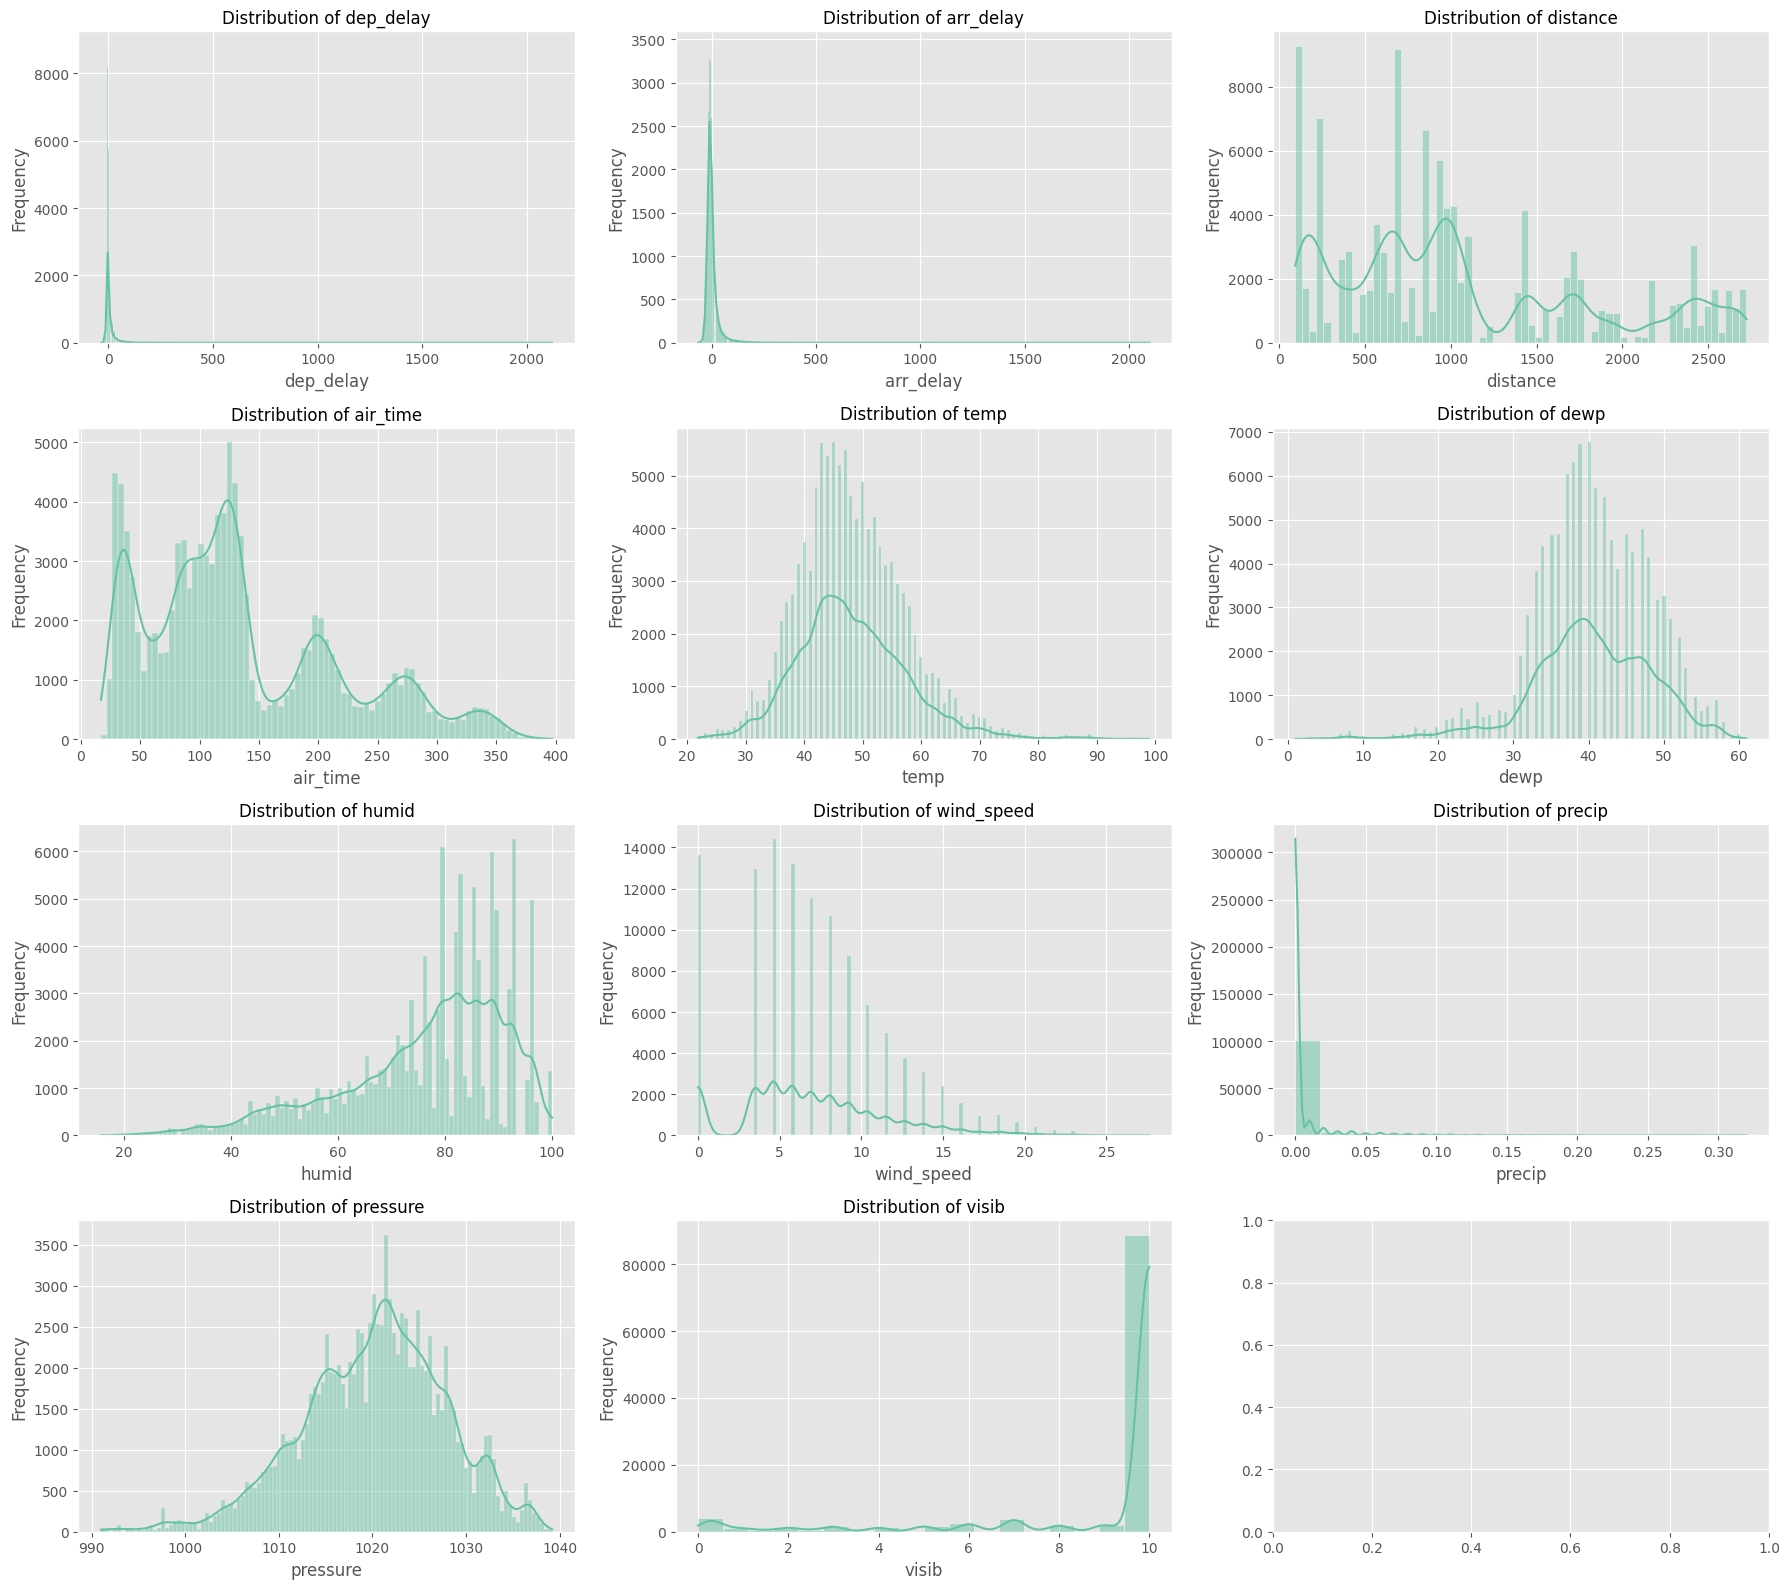

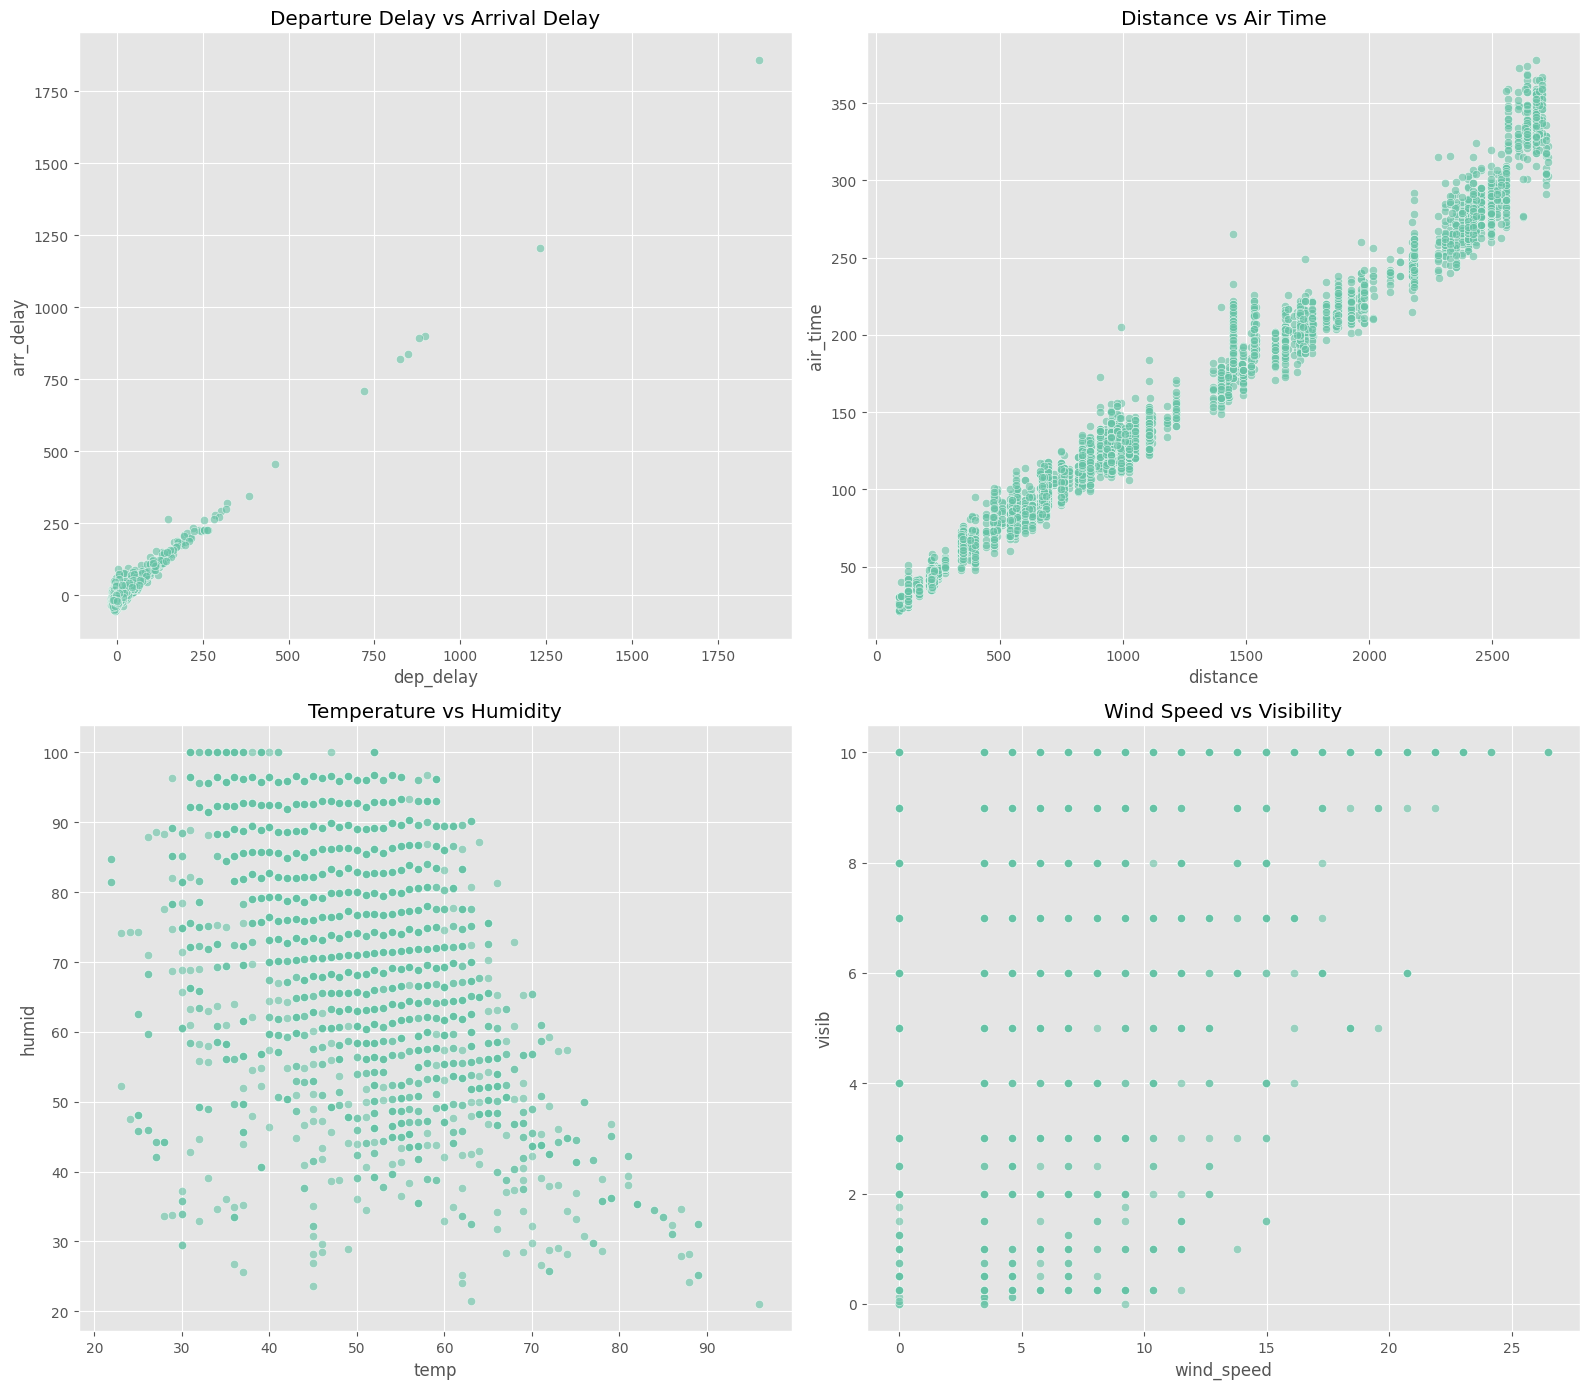

<Figure size 1200x600 with 0 Axes>

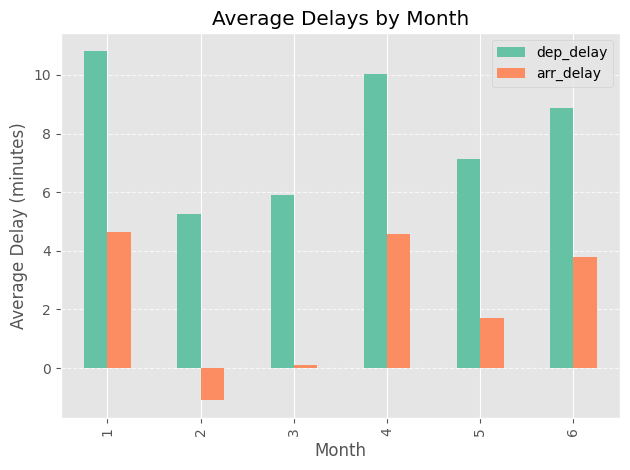

In [38]:
import seaborn as sns
import numpy as np 

# Basic summary statistics
print("Dataset shape:", df.shape)
print("\nData types summary:")
df.dtypes.value_counts()

# Visualization settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set_palette("Set2")

# Create a function to create histograms
def plot_histograms(dataframe, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(18, 16))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        if i < len(axes):  # Ensure we don't exceed the available axes
            sns.histplot(dataframe[col].dropna(), kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}', fontsize=12)
            axes[i].set_ylabel('Frequency')
            
    plt.tight_layout()
    plt.show()

# Select important numeric columns for visualization
viz_cols = ['dep_delay', 'arr_delay', 'distance', 'air_time', 'temp', 
           'dewp', 'humid', 'wind_speed', 'precip', 'pressure', 'visib']

# Plot histograms
plot_histograms(df, viz_cols, 4, 3)

# Scatter plots for important relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Relationship between departure delay and arrival delay
sns.scatterplot(x='dep_delay', y='arr_delay', data=df.sample(5000), 
                alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title('Departure Delay vs Arrival Delay')

# Relationship between distance and air time
sns.scatterplot(x='distance', y='air_time', data=df.sample(5000), 
                alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Distance vs Air Time')

# Temperature vs Humidity
sns.scatterplot(x='temp', y='humid', data=df.sample(5000), 
                alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Temperature vs Humidity')

# Wind Speed vs Visibility
sns.scatterplot(x='wind_speed', y='visib', data=df.sample(5000), 
                alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Wind Speed vs Visibility')

plt.tight_layout()
plt.show()

# Monthly average delays
monthly_delays = df.groupby('month')[['dep_delay', 'arr_delay']].mean()

plt.figure(figsize=(12, 6))
monthly_delays.plot(kind='bar')
plt.title('Average Delays by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

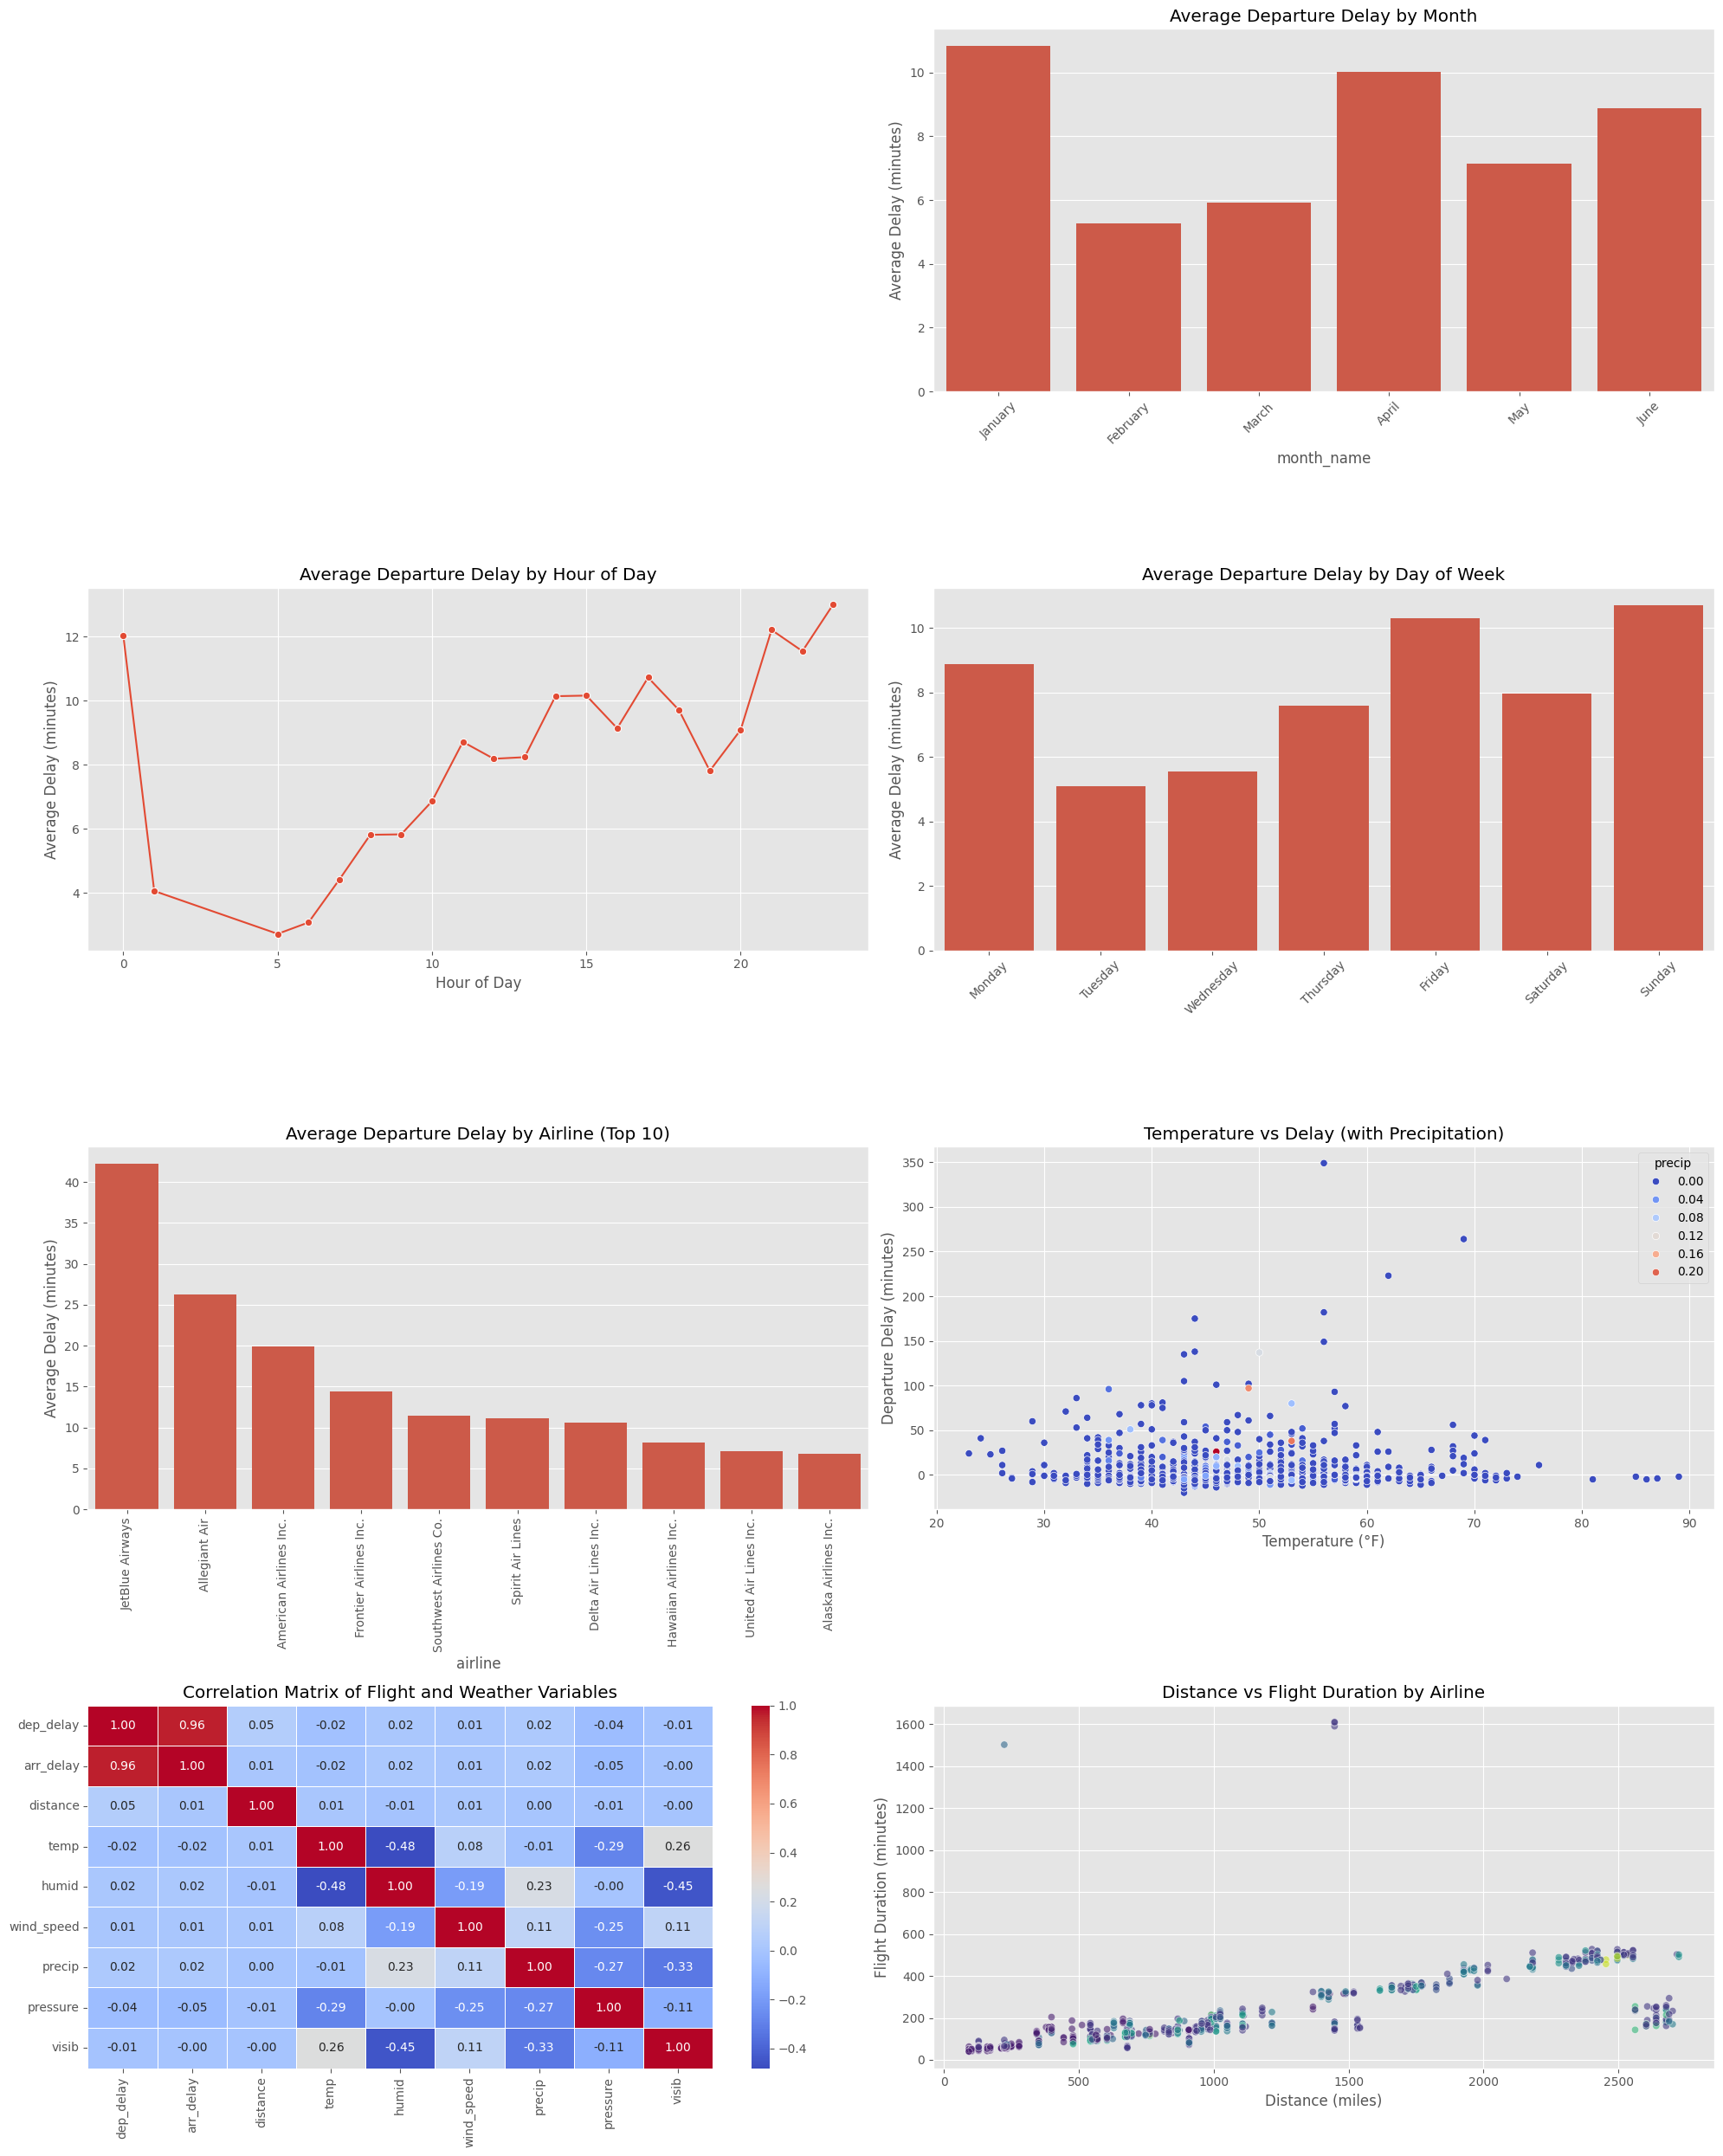


--- Numerical Summary Statistics ---
           dep_delay      arr_delay       distance  flight_duration
count  108566.000000  108332.000000  110878.000000    108469.000000
mean        8.029162       2.344543    1067.897148       199.225843
std        41.597614      43.002019     746.636880       148.511043
min       -36.000000     -65.000000      93.000000        22.000000
25%        -5.000000     -14.000000     543.000000       106.000000
50%        -2.000000      -5.000000     909.000000       151.000000
75%         6.000000       6.000000    1542.000000       243.000000
max      2120.000000    2098.000000    2724.000000      1948.000000

--- Cancellation Rate by Carrier ---
carrier
B6    4.918033
NK    4.524362
AS    3.117356
AA    2.316708
DL    2.297387
G4    2.173913
OO    1.244438
QX    1.207264
WN    1.010820
F9    0.000000
HA    0.000000
UA    0.000000
Name: cancel, dtype: float64

--- Top 5 Routes with Most Delays ---
route
PDX - DSM    35.772727
PDX - GRR    35.136364
PDX 

In [37]:
import seaborn as sns

# Set up the visualization style and figure size
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create a multi-part EDA dashboard
fig = plt.figure(figsize=(20, 25))


# 2. Delays by Month
ax2 = plt.subplot(4, 2, 2)
monthly_delays = df.groupby('month_name')['dep_delay'].mean().reindex(['January', 'February', 'March', 
                                                                       'April', 'May', 'June'])
sns.barplot(x=monthly_delays.index, y=monthly_delays.values, ax=ax2)
ax2.set_title('Average Departure Delay by Month')
ax2.set_ylabel('Average Delay (minutes)')
ax2.tick_params(axis='x', rotation=45)

# 3. Delay by Time of Day
ax3 = plt.subplot(4, 2, 3)
hourly_delays = df.groupby('hour')['dep_delay'].mean()
sns.lineplot(x=hourly_delays.index, y=hourly_delays.values, marker='o', ax=ax3)
ax3.set_title('Average Departure Delay by Hour of Day')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Average Delay (minutes)')

# 4. Delay by Day of Week
ax4 = plt.subplot(4, 2, 4)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_delays = df.groupby('day_of_week')['dep_delay'].mean()
sns.barplot(x=[day_names[i] for i in day_delays.index], y=day_delays.values, ax=ax4)
ax4.set_title('Average Departure Delay by Day of Week')
ax4.set_ylabel('Average Delay (minutes)')
ax4.tick_params(axis='x', rotation=45)

# 5. Delays by Airline 
ax5 = plt.subplot(4, 2, 5)
airline_delays = df.groupby('airline')['dep_delay'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=airline_delays.index, y=airline_delays.values, ax=ax5)
ax5.set_title('Average Departure Delay by Airline (Top 10)')
ax5.set_ylabel('Average Delay (minutes)')
ax5.tick_params(axis='x', rotation=90)

# 6. Weather Impact - Temperature vs Delay
ax6 = plt.subplot(4, 2, 6)
sns.scatterplot(data=df.sample(1000), x='temp', y='dep_delay', hue='precip', palette='coolwarm', ax=ax6)
ax6.set_title('Temperature vs Delay (with Precipitation)')
ax6.set_xlabel('Temperature (°F)')
ax6.set_ylabel('Departure Delay (minutes)')

# 7. Correlation Heatmap
ax7 = plt.subplot(4, 2, 7)
corr_cols = ['dep_delay', 'arr_delay', 'distance', 'temp', 'humid', 
            'wind_speed', 'precip', 'pressure', 'visib']
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax7)
ax7.set_title('Correlation Matrix of Flight and Weather Variables')

# 8. Distance vs Flight Duration
ax8 = plt.subplot(4, 2, 8)
sns.scatterplot(data=df.sample(1000), x='distance', y='flight_duration', hue='airline', 
                palette='viridis', alpha=0.6, ax=ax8)
ax8.set_title('Distance vs Flight Duration by Airline')
ax8.set_xlabel('Distance (miles)')
ax8.set_ylabel('Flight Duration (minutes)')
ax8.legend_.remove()  # Remove legend to avoid overcrowding

plt.tight_layout()
plt.show()

# Additional statistics
print("\n--- Numerical Summary Statistics ---")
print(df[['dep_delay', 'arr_delay', 'distance', 'flight_duration']].describe())

print("\n--- Cancellation Rate by Carrier ---")
cancellation_rate = df.groupby('carrier')['cancel'].mean().sort_values(ascending=False) * 100
print(cancellation_rate)

print("\n--- Top 5 Routes with Most Delays ---")
route_delays = df.groupby('route')['dep_delay'].mean().sort_values(ascending=False).head(5)
print(route_delays)

print("\n--- Weather Correlation with Delays ---")
weather_delay_corr = df[['dep_delay', 'temp', 'humid', 'wind_speed', 'precip', 'visib']].corr()['dep_delay'].drop('dep_delay')
print(weather_delay_corr)

In [ ]:
# def detect_outliers_iqr(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
#     return outliers
# len(detect_outliers_iqr(df['precip']))

In [ ]:


# By default NA values are excluded from group keys during the Pandas groupby operation
#Counting number of cancelled flights and mean departure delay time by routes
routes_delays_cancels = df.groupby("route").agg(avg_delay = ("dep_delay", "mean"), no_cancelled = ("cancel", "sum"))

# Counting number of cancelled flights and mean delay time by airlines
airlines_delays_cancels = df.groupby("airline").agg(avg_delay = ("dep_delay", "mean"), no_cancelled = ("cancel", "sum"))

print(routes_delays_cancels, airlines_delays_cancels)

           avg_delay  no_cancelled
route                             
PDX - ABQ   0.611842             2
PDX - ANC   4.748936             4
PDX - ATL   7.050967            13
PDX - AUS   5.435374             5
PDX - BOI   5.165939             7
...              ...           ...
SEA - STS   6.397333             5
SEA - SUN   5.735537             5
SEA - TPA   6.553015            20
SEA - TUS   6.180608            13
SEA - YKM   5.460000            11

[149 rows x 2 columns]                         avg_delay  no_cancelled
airline                                        
Alaska Airlines Inc.     6.751572          1300
Allegiant Air           26.255556             2
American Airlines Inc.  19.913783            85
Delta Air Lines Inc.    10.626629           379
Frontier Airlines Inc.  14.427602             0
Hawaiian Airlines Inc.   8.186207             0
Horizon Air              6.253491           238
JetBlue Airways         42.203762            33
SkyWest Airlines Inc.    4.612112        

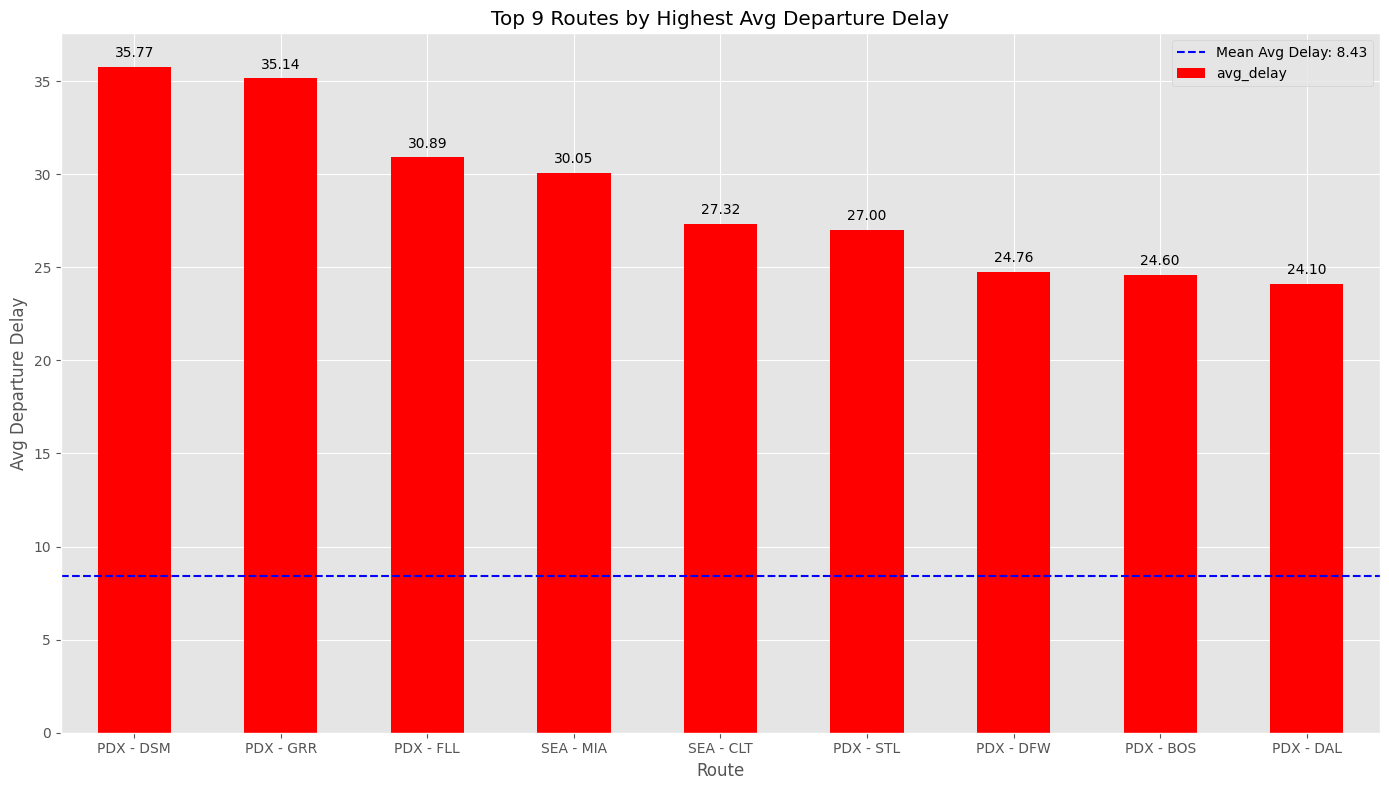

In [ ]:
top9_routes_delays = routes_delays_cancels.nlargest(n = 9, columns = "avg_delay").iloc[:,0]     # Sort Top 9 by Avg Delay column, slicing df

mean_delay = routes_delays_cancels['avg_delay'].mean()

plt.figure(figsize= (14, 8))
bar1 = top9_routes_delays.plot(kind="bar", color="red")
plt.title("Top 9 Routes by Highest Avg Departure Delay")
plt.xlabel("Route")
plt.ylabel("Avg Departure Delay")
plt.xticks(rotation=0)

plt.axhline(y=mean_delay, color='blue', linestyle='--', label=f'Mean Avg Delay: {mean_delay:.2f}')


for i in bar1.patches:
    bar1.annotate(f'{i.get_height():.2f}',                                                      # Get data label, specify 2 decimals
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.legend()
plt.tight_layout()
plt.show()

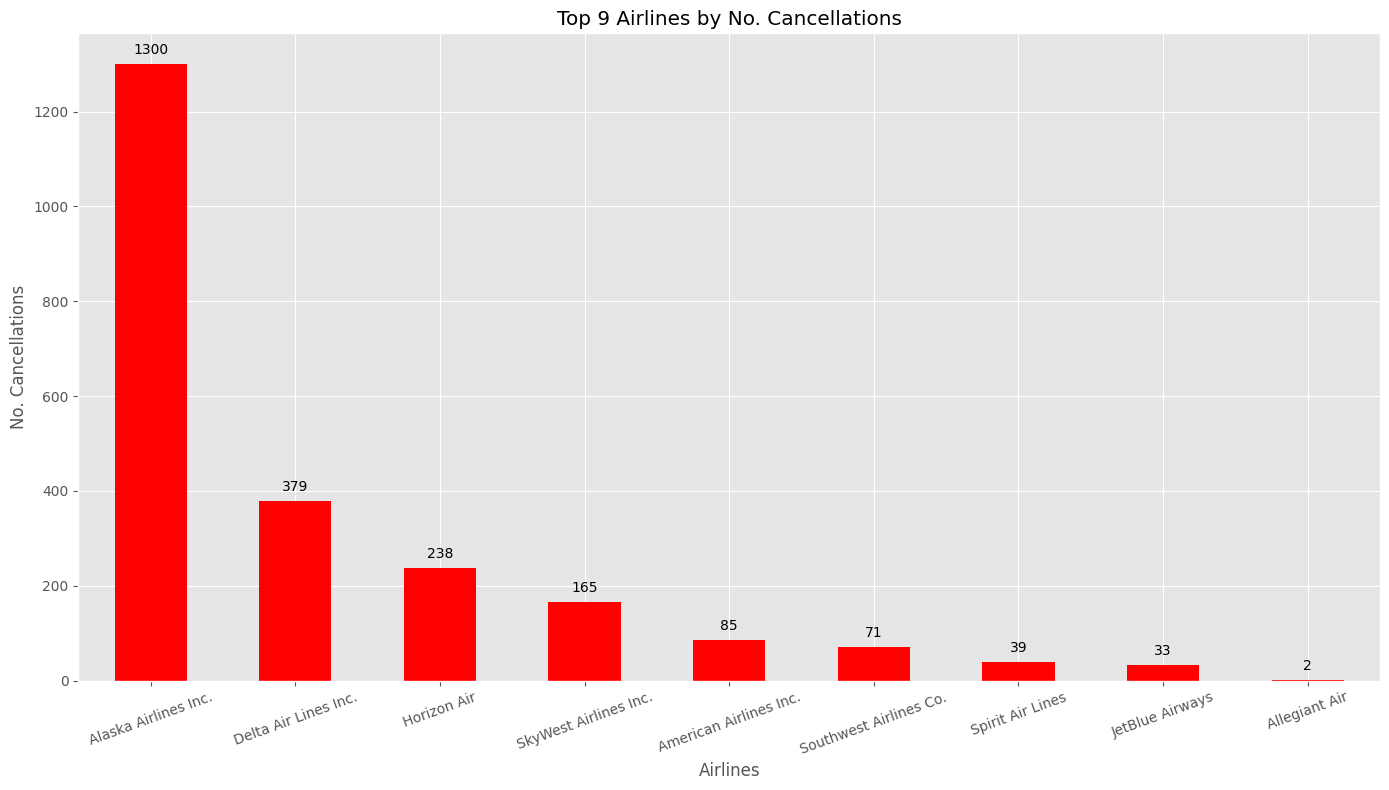

In [ ]:
top9_airlines_cancel = airlines_delays_cancels.nlargest(n = 9, columns = "no_cancelled").iloc[:,1]
plt.figure(figsize=(14, 8))
bar2 = top9_airlines_cancel.plot(kind="bar", color="red")
plt.title("Top 9 Airlines by No. Cancellations")
plt.xlabel("Airlines")
plt.ylabel("No. Cancellations")
plt.xticks(rotation = 20)
for i in bar2.patches:
    bar2.annotate(i.get_height(),                                                      # Get data label
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
# Selecting features and target variable
X = df[["distance", "temp", "dewp", "humid", "pressure","precip", "visib"]]
Y = df["cancel"]

#"month", "day", "sched_dep_time"

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = gnb.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generating the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(X)


Accuracy: 0.9596861471861472
Confusion Matrix:
[[21256   454]
 [  440    26]]
        distance  temp  dewp  humid  pressure  precip  visib
0           1874  33.0  23.0  66.06    1022.9     0.0   10.0
1           1533  32.0  23.0  69.04    1023.4     0.0   10.0
2           2182  33.0  23.0  66.06    1022.9     0.0   10.0
3           1721  33.0  23.0  66.06    1022.9     0.0   10.0
4           1739  33.0  19.0  55.75    1025.1     0.0   10.0
...          ...   ...   ...    ...       ...     ...    ...
111001      1660  56.0  51.0  83.88    1021.5     0.0   10.0
111002       748  60.0  53.0  77.65    1021.9     0.0   10.0
111003      1024  65.0  53.0  65.56    1021.3     0.0   10.0
111004      1024  56.0  51.0  83.88    1021.5     0.0   10.0
111005       512  56.0  50.0  80.52    1021.8     0.0   10.0

[110878 rows x 7 columns]


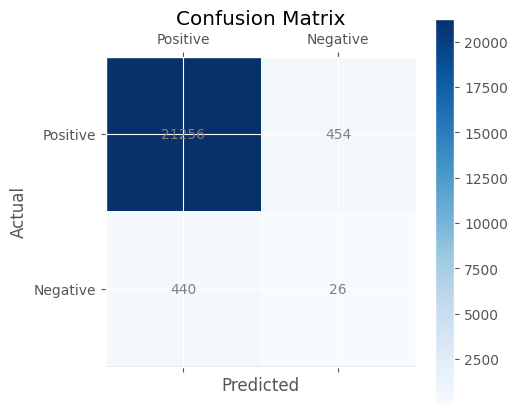

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Explicitly set the tick positions
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))

# Then, set the tick labels
ax.set_xticklabels(["Positive", "Negative"])
ax.set_yticklabels(["Positive", "Negative"])

# Display the numbers on the colors
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha="center", va="center", color="Grey")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()